<a href="https://colab.research.google.com/github/StefanoBergia/Tensorflow/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
#Load dataset
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data.data.shape

(569, 30)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
print(data.target_names)
print(data.target.shape)

['malignant' 'benign']
(569,)


In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.3)
N,D=X_train.shape
print(N,D)

398 30


In [10]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)       #
X_test=scaler.transform(X_test)

In [11]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),        #D=numero di features
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#si può anche fare:
#model=tf.keras.models.Sequential()
#model.add( tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

print("Train score:", model.evaluate(X_train,y_train))
print("Test score:", model.evaluate(X_test,y_test))

Epoch 1/100
13/13 [==============================] - 1s 29ms/step - loss: 0.9142 - accuracy: 0.4221 - val_loss: 0.9390 - val_accuracy: 0.4327
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.8175 - accuracy: 0.4874 - val_loss: 0.8409 - val_accuracy: 0.4854
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7301 - accuracy: 0.5452 - val_loss: 0.7598 - val_accuracy: 0.5556
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6594 - accuracy: 0.6030 - val_loss: 0.6914 - val_accuracy: 0.6023
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 0.5990 - accuracy: 0.6533 - val_loss: 0.6336 - val_accuracy: 0.6667
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 0.5479 - accuracy: 0.7111 - val_loss: 0.5858 - val_accuracy: 0.7778
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5045 - accuracy: 0.7563 - val_loss: 0.5465 - val_accuracy: 0.7895
Epoch 8/10

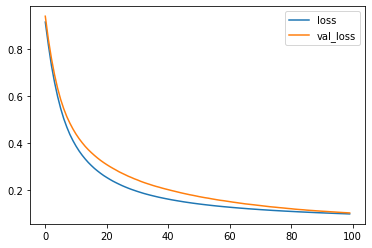

In [12]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

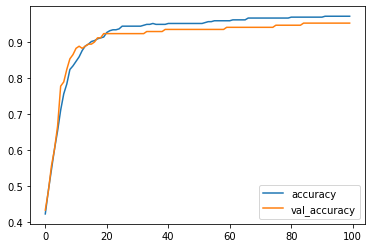

In [13]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()